In [5]:
from pathlib import Path
import typing
import yaml
from collections import Counter

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
import workingmem
import workingmem.model
from workingmem.task.SIR import SIRDataset, SIRConfig, SIRTokenizer

In [7]:
def mkdataset(concurrent_reg: int, n_reg: int = 100, ss: bool = False) -> SIRDataset:
    config = SIRConfig(
        generate=False,
        n_reg=n_reg,
        concurrent_reg=concurrent_reg,
        concurrent_items=4,
        seq_len=300,
        global_split_set_control=ss,
        split="test",
    )
    sird = SIRDataset(config)
    print(repr(sird))
    return sird

In [8]:
dataset_100_2 = mkdataset(2)

SIRDataset_9205EE_(concurrent_items=4,concurrent_reg=2,global_split_set_control=None,heldout_items=0,heldout_reg=0,ignore_prob=0.5,load=True,local_split_set_control=None,locality=None,n_items=50,n_reg=100,n_test=1000,n_train=100000,n_val=1000,same_diff_prob=0.5,seed=None,seq_len=300)


In [9]:
dataset_100_32 = mkdataset(32)

SIRDataset_B79046_(concurrent_items=4,concurrent_reg=32,global_split_set_control=None,heldout_items=0,heldout_reg=0,ignore_prob=0.5,load=True,local_split_set_control=None,locality=None,n_items=50,n_reg=100,n_test=1000,n_train=100000,n_val=1000,same_diff_prob=0.5,seed=None,seq_len=300)


In [10]:
dataset_100_2.data[1]

{'items_used': [8, 40, 41, 23],
 'locality': None,
 'regs_used': [65, 47],
 'sequence': 'St reg_47 item_40 diff St reg_65 item_40 diff St reg_47 item_41 diff Ig reg_65 item_40 same Ig reg_65 item_41 diff St reg_47 item_23 diff St reg_65 item_40 same St reg_65 item_23 diff St reg_47 item_23 same Ig reg_47 item_40 diff St reg_47 item_23 same Ig reg_47 item_23 same Ig reg_65 item_23 same Ig reg_47 item_8 diff St reg_65 item_23 same Ig reg_65 item_8 diff Ig reg_65 item_23 same St reg_65 item_23 same St reg_65 item_23 same St reg_47 item_23 same Ig reg_47 item_23 same St reg_65 item_23 same Ig reg_47 item_40 diff St reg_47 item_23 same Ig reg_65 item_23 same St reg_47 item_23 same St reg_47 item_23 same Ig reg_47 item_23 same Ig reg_65 item_41 diff St reg_65 item_23 same Ig reg_47 item_23 same Ig reg_47 item_23 same Ig reg_47 item_41 diff St reg_65 item_23 same St reg_47 item_23 same St reg_65 item_23 same St reg_65 item_23 same St reg_47 item_8 diff Ig reg_47 item_8 same St reg_65 item_40 

In [11]:
dataset_100_32.data[1]

{'items_used': [30, 18, 29, 44],
 'locality': None,
 'regs_used': [25,
  33,
  23,
  86,
  3,
  10,
  75,
  37,
  61,
  69,
  94,
  36,
  31,
  16,
  45,
  68,
  51,
  42,
  95,
  80,
  90,
  19,
  0,
  57,
  35,
  41,
  82,
  50,
  92,
  62,
  32,
  7],
 'sequence': 'St reg_86 item_44 diff St reg_62 item_18 diff St reg_16 item_44 diff St reg_57 item_29 diff St reg_82 item_18 diff St reg_35 item_29 diff St reg_0 item_18 diff Ig reg_57 item_29 same St reg_68 item_18 diff St reg_35 item_29 same St reg_75 item_29 diff St reg_7 item_30 diff St reg_41 item_44 diff St reg_82 item_44 diff St reg_36 item_18 diff St reg_19 item_18 diff St reg_32 item_18 diff St reg_25 item_18 diff St reg_68 item_30 diff St reg_37 item_18 diff Ig reg_35 item_30 diff St reg_94 item_18 diff Ig reg_75 item_44 diff St reg_51 item_29 diff St reg_25 item_30 diff St reg_95 item_30 diff St reg_61 item_18 diff St reg_33 item_29 diff Ig reg_75 item_29 same St reg_0 item_29 diff Ig reg_35 item_29 same Ig reg_62 item_18 sam

In [12]:
def count_symbols(
    sird: SIRDataset,
    first_n: int = 128,
) -> typing.Tuple[typing.Counter[str], list, list, list, list]:
    """
    Count the number of symbols in the dataset and their cumulative counts over time.
    """
    symbol_ctr = Counter()
    reg_0_timeseries = []
    item_0_timeseries = []
    instr_timeseries = []
    samediff_timeseries = []
    for i in range(len(sird)):
        if i >= first_n:
            break

        tokens = Counter(sird.data[i]["sequence"].split())
        symbol_ctr.update(tokens)
        reg_0_timeseries.append(symbol_ctr["reg_0"])
        item_0_timeseries.append(symbol_ctr["item_0"])
        instr_timeseries.append(symbol_ctr["St"])
        samediff_timeseries.append(symbol_ctr["same"])

    return (
        symbol_ctr,
        reg_0_timeseries,
        item_0_timeseries,
        instr_timeseries,
        samediff_timeseries,
    )

In [27]:
ulimit = 12800
(
    symbol_ctr_10_2,
    reg_0_timeseries_10_2,
    item_0_timeseries_10_2,
    instr_timeseries_10_2,
    samediff_timeseries_10_2,
) = count_symbols(dataset_100_2, first_n=ulimit)
(
    symbol_ctr_10_6,
    reg_0_timeseries_10_6,
    item_0_timeseries_10_6,
    instr_timeseries_10_6,
    samediff_timeseries_10_6,
) = count_symbols(dataset_100_32, first_n=ulimit)

In [28]:
df = []
for source, d in [
    ("100_2", symbol_ctr_10_2),
    ("100_32", symbol_ctr_10_6),
]:
    for k, v in d.items():
        print(source, k, v)
        df += [{"symbol": k, "count": v, "data_source": source}]

df_cumulative = pd.DataFrame(df)
# put the special symbols at the beggining: 'St' and 'Ig' and 'same' and 'diff'
df_cumulative["symbol"] = pd.Categorical(
    df_cumulative["symbol"],
    categories=(spl_syms := ["St", "Ig", "same", "diff"])
    + list(
        sorted(
            set([*symbol_ctr_10_2.keys()] + [*symbol_ctr_10_6.keys()]).difference(
                spl_syms
            )
        )
    ),
    ordered=True,
)
df_cumulative = df_cumulative.sort_values("symbol")
df_cumulative = df_cumulative.reset_index(drop=True)
df_cumulative["symbol"] = df_cumulative["symbol"].astype(str)
df_cumulative

100_2 St 150730
100_2 reg_41 3427
100_2 item_27 6260
100_2 diff 151238
100_2 reg_60 3838
100_2 item_49 4748
100_2 Ig 149270
100_2 item_19 7009
100_2 same 148762
100_2 item_14 5927
100_2 reg_47 3140
100_2 item_40 5157
100_2 reg_65 3483
100_2 item_41 4988
100_2 item_23 6878
100_2 item_8 4623
100_2 reg_9 2867
100_2 item_20 5664
100_2 reg_59 4498
100_2 item_11 6972
100_2 reg_4 3875
100_2 item_24 7270
100_2 item_29 5633
100_2 item_13 6087
100_2 reg_51 2572
100_2 item_26 4758
100_2 reg_84 3455
100_2 item_33 6555
100_2 item_32 7187
100_2 item_34 5692
100_2 reg_5 3692
100_2 reg_85 2531
100_2 item_9 6309
100_2 reg_29 2849
100_2 item_31 6547
100_2 item_18 5699
100_2 reg_24 2445
100_2 item_4 5172
100_2 reg_2 3084
100_2 item_21 6104
100_2 item_17 5762
100_2 reg_42 3163
100_2 reg_25 3277
100_2 item_36 6095
100_2 item_15 6143
100_2 reg_33 2740
100_2 item_44 6637
100_2 reg_57 3826
100_2 item_45 5546
100_2 item_6 6794
100_2 reg_18 2956
100_2 reg_45 2572
100_2 item_42 6057
100_2 item_2 5793
100_2 reg_3

,symbol,count,data_source
0,St,150730,100_2
1,St,166389,100_32
2,Ig,133611,100_32
3,Ig,149270,100_2
4,same,148762,100_2
...,...,...,...
303,reg_97,3196,100_32
304,reg_98,2888,100_32
305,reg_98,2515,100_2
306,reg_99,3478,100_2


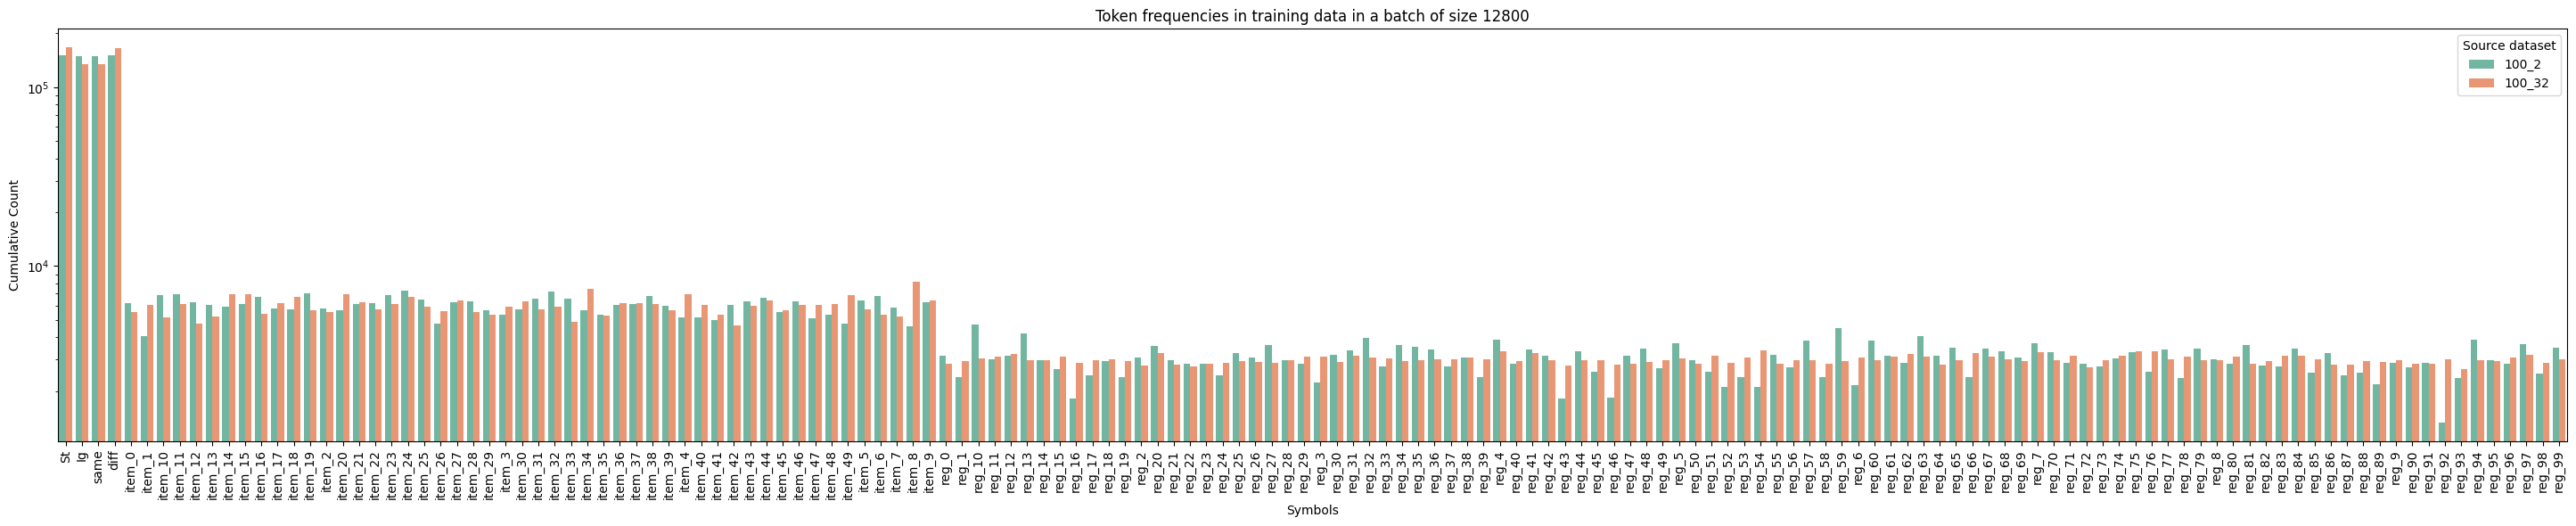

In [29]:
# plot side-by-side bar plots of the number of cumulative symbols over the entire dataset

fig, ax = plt.subplots(figsize=(29, 6))
sns.barplot(
    data=df_cumulative,
    x="symbol",
    y="count",
    hue="data_source",
    dodge=True,
    palette=sns.color_palette("Set2", n_colors=2),
    ax=ax,
)

ax.set_title(f"Token frequencies in training data in a batch of size {ulimit}")
ax.set_yscale("log")
ax.set_xlabel("Symbols")
ax.set_ylabel("Cumulative Count")
ax.legend(title="Source dataset")
# rotate x axis labels
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [16]:
df_time = pd.DataFrame(
    {
        "time": range(len(reg_0_timeseries_10_2)),
        "reg_0": reg_0_timeseries_10_2,
        "item_0": item_0_timeseries_10_2,
        "St": instr_timeseries_10_2,
        "same": samediff_timeseries_10_2,
        "source": "10_2",
    }
)
df_time = pd.concat(
    [
        df_time,
        pd.DataFrame(
            {
                "time": range(len(reg_0_timeseries_10_6)),
                "reg_0": reg_0_timeseries_10_6,
                "item_0": item_0_timeseries_10_6,
                "St": instr_timeseries_10_6,
                "same": samediff_timeseries_10_6,
                "source": "10_6",
            }
        ),
    ],
    ignore_index=True,
)
df_time = df_time.melt(
    id_vars=["time", "source"],
    value_vars=["reg_0", "item_0", "St", "same"],
    var_name="symbol",
    value_name="count",
)
df_time

,time,source,symbol,count
0,0,10_2,reg_0,0
1,1,10_2,reg_0,0
2,2,10_2,reg_0,0
3,3,10_2,reg_0,0
4,4,10_2,reg_0,0
...,...,...,...,...
1019,123,10_6,same,16670
1020,124,10_6,same,16805
1021,125,10_6,same,16928
1022,126,10_6,same,17059


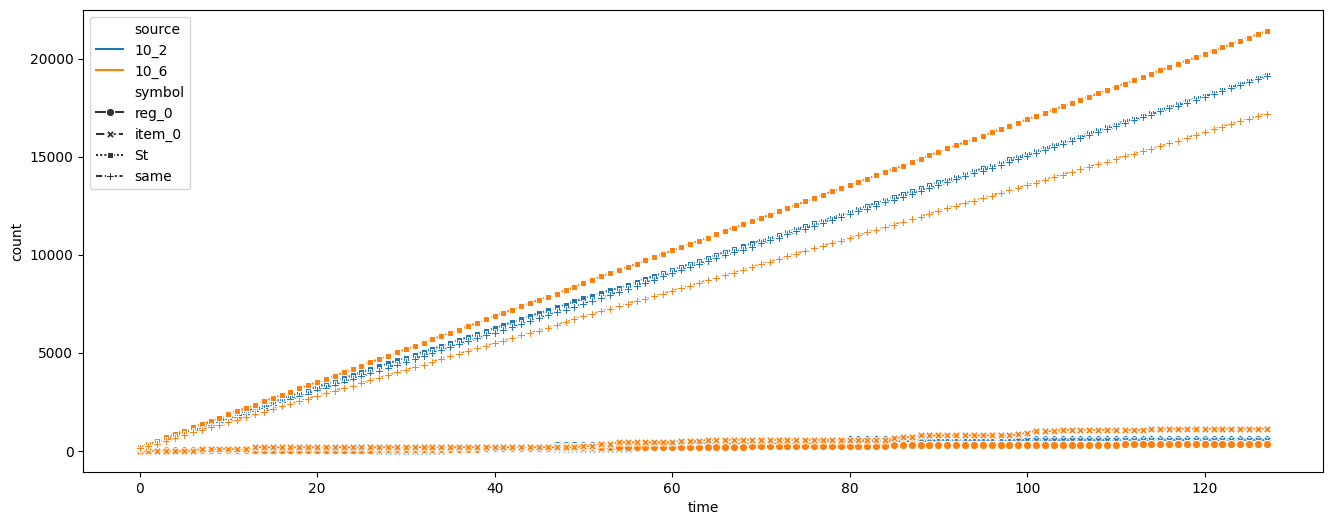

In [17]:
# plot the frequency of the symbols over time
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(
    data=df_time,
    x="time",
    y="count",
    hue="source",
    style="symbol",
    markers=True,
    ax=ax,
)
# ax.set_yscale("log")
# ax.set_xscale("log")
plt.show()